# Data preperation for Basque country

* geographic sourrounding
* Population density in sourrounding
* most important flows to and from the regions (all data)
* transport activity within regions
* 

In [84]:
# data sources
path_nuts = "C:\PhD\Projekte\GitHub\commercialfleet\geography/NUTS_RG_03M_2021_3857/"
etis_data = "C:\PhD\Projekte\iDesignRES\Data\etis_2010_harmonised/etis_2010_modelled/"
# geographic data 

basque_nut = "ES21"
basque_nuts_3 = ["ES211", "ES212", "ES213"]
neighbours_nuts_2 = ["ES22", "ES23", "ES41", "ES13"]
neighbours_nuts_3 = ["ES220", "ES230", "ES412", "ES130"]


In [85]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##  visualization of geopandas



In [86]:
file = gpd.read_file(path_nuts)
print(file.keys())
neighbours_n3 = file[file["NUTS_ID"].isin(neighbours_nuts_3)]
basque = file[file["NUTS_ID"].isin(basque_nuts_3)]
basque_n3 = file[file["NUTS_ID"] == basque_nut]
neighbours_n2 = file[file["NUTS_ID"].isin(neighbours_nuts_2)]

Index(['NUTS_ID', 'LEVL_CODE', 'CNTR_CODE', 'NAME_LATN', 'NUTS_NAME',
       'MOUNT_TYPE', 'URBN_TYPE', 'COAST_TYPE', 'FID', 'geometry'],
      dtype='object')


    NUTS_ID  LEVL_CODE CNTR_CODE                   NAME_LATN  \
240    ES22          2        ES  Comunidad Foral de Navarra   
241    ES23          2        ES                    La Rioja   
416    ES41          2        ES             Castilla y León   
433    ES13          2        ES                   Cantabria   

                      NUTS_NAME  MOUNT_TYPE  URBN_TYPE  COAST_TYPE   FID  \
240  Comunidad Foral de Navarra         0.0        NaN           0  ES22   
241                    La Rioja         0.0        NaN           0  ES23   
416             Castilla y León         0.0        NaN           0  ES41   
433                   Cantabria         0.0        NaN           0  ES13   

                                              geometry  
240  MULTIPOLYGON (((-192460.602 5357148.754, -1859...  
241  POLYGON ((-324344.643 5164401.155, -327035.124...  
416  MULTIPOLYGON (((-538901.941 5339518.250, -5392...  
433  MULTIPOLYGON (((-450390.867 5276508.191, -4513...  


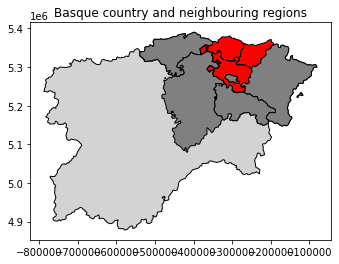

In [87]:

fig, ax = plt.subplots()
basque.plot(ax=ax, color="None", edgecolor="black", zorder=10)
neighbours_n3.plot(ax=ax, color="grey", edgecolor="black", zorder=5)
basque_n3.plot(ax=ax, color="red", edgecolor="red", zorder=3)
neighbours_n2.plot(ax=ax, color="lightgrey", edgecolor="black", zorder=0)
plt.title("Basque country and neighbouring regions")
print(neighbours_n2)

# TODO: indicate Bilbao + Infrastructure (get this from Open Street Map)




Text(0.5, 1.0, 'Basque country: regional transport activity')

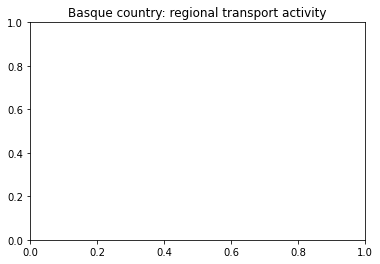

In [88]:
fig, ax = plt.subplots()
plt.title("Basque country: regional transport activity")
#  https://www.investinspain.org/en/why-spain/infrastructures
 

Text(0.5, 1.0, 'Basque country: vehicle stock')

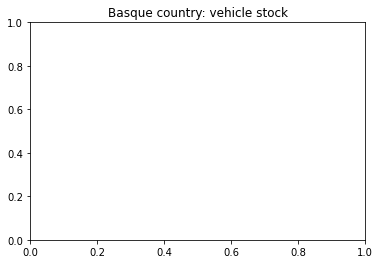

In [89]:
plt.title("Basque country: vehicle stock")

In [90]:
# TODO: find flows to where the freight transport goes and where it comes from (ETIS data)

etis_codes = {
    "ES": 110,
    "ES1": 11001,
    "ES2": 11002,
    "ES4": 11004,
    "ES41": 1100401,
    "ES13": 1100103,
    "ES21": 1100201,
    "ES22": 1100202,
    "ES23": 1100203,
    "ES24": 1100204,
    "ES211": 110020101,
    "ES212": 110020102,
    "ES213": 110020103,
    "ES220": 110020200,
    "ES230": 110020300,
    "ES412": 110040102,
    "ES130": 110010300
}

mode_codes = {
    1: "Car",
    2: "Rail",
    3: "Bus",
    4: "Air",
    5: "TramMetro",
    6: "Walking",
    7: "Cycling"
}

etis_codes_nuts_3 = {key: value for key, value in etis_codes.items() if len(key) == 5}
reverse_etis_codes = {value: key for key, value in etis_codes.items()}
reverse_etis_codes_nuts_3 = {value: key for key, value in etis_codes_nuts_3.items()}
print(reverse_etis_codes)
basque_country_etis_reversed = {value:key for key, value in etis_codes.items() if key.startswith("ES21")}

{110: 'ES', 11001: 'ES1', 11002: 'ES2', 11004: 'ES4', 1100401: 'ES41', 1100103: 'ES13', 1100201: 'ES21', 1100202: 'ES22', 1100203: 'ES23', 1100204: 'ES24', 110020101: 'ES211', 110020102: 'ES212', 110020103: 'ES213', 110020200: 'ES220', 110020300: 'ES230', 110040102: 'ES412', 110010300: 'ES130'}


what to do? 
* get to know etis codes of the basque country
* first: passenger cars
* then: trucks 


In [91]:
filename_mode_trips = "p_transport_car.csv"

p_mode_trips_csv = pd.read_csv(etis_data + filename_mode_trips)
print(p_mode_trips_csv.keys())

Index(['ID', 'ORIGINZONE_3_ID', 'DEST_ZONE_3_ID', 'TRIP_PURPOSE_ID',
       'p_transport_car_trips', 'p_transport_car_vehicles'],
      dtype='object')


In [92]:
# filtering for the three nuts_3 regions
# cut_off_value = 100 * 365
filtered_origin_flows = []
filtered_destination_flows = []
df = pd.DataFrame(columns=list(p_mode_trips_csv.keys()))
#for nut in basque_nuts_3 + neighbours_nuts_3:
for nut in basque_nuts_3:

    curr_etis_code = etis_codes[nut]
    temp_origins = p_mode_trips_csv[p_mode_trips_csv["ORIGINZONE_3_ID"] == curr_etis_code]
    temp_origins = temp_origins.sort_values(by='p_transport_car_trips', ascending=False)
    temp_dest = p_mode_trips_csv[p_mode_trips_csv["DEST_ZONE_3_ID"] == curr_etis_code]
    temp_dest = temp_dest.sort_values(by='p_transport_car_trips', ascending=False)
    total_flows_origin = temp_origins['p_transport_car_trips'].sum()
    total_flows_dest = temp_dest['p_transport_car_trips'].sum()
    # temp_origins = temp_origins[temp_origins['p_transport_tot_trips_mode'] > cut_off_value]
    # temp_dest = temp_dest[temp_dest['p_transport_tot_trips_mode'] > cut_off_value]
    temp_origins = temp_origins[temp_origins['DEST_ZONE_3_ID'].isin(etis_codes.values())]
    temp_dest = temp_dest[temp_dest['ORIGINZONE_3_ID'].isin(etis_codes.values())]
    filtered_origin_flows.append(temp_origins)
    filtered_destination_flows.append(temp_dest)
    temp_origins.to_csv("temp_data/origin_flows_" + nut + ".csv")
    temp_dest.to_csv("temp_data/destination_flows_" + nut + ".csv")
    df = pd.concat([df, temp_origins, temp_dest], ignore_index=True)


    print(nut, temp_origins['p_transport_car_trips'].sum()/total_flows_origin * 100)
    print(nut, temp_dest['p_transport_car_trips'].sum()/total_flows_dest * 100)
    
df = df.drop_duplicates(subset=['ORIGINZONE_3_ID', 'DEST_ZONE_3_ID', "TRIP_PURPOSE_ID"], keep="last")
df = df[df["p_transport_car_trips"]>0]
df.to_csv("temp_data/extended_flows_v2.csv")

ES211 98.7946164176074
ES211 99.70867087351657
ES212 98.20864703814493
ES212 99.790290683737
ES213 98.45577661276302
ES213 99.82780804288565


In [93]:
import ast

_reduced_flows = pd.read_csv("temp_data/total_origin_destination_flows_edited_with_routes.csv", sep=";")
_extended_flows = pd.read_csv("temp_data/extended_flows_v2.csv")
_extended_flows["path"] = None

for kl in range(len(_extended_flows)):
    temp_od_touple = (_extended_flows.iloc[kl]["ORIGINZONE_3_ID"], _extended_flows.iloc[kl]["DEST_ZONE_3_ID"])
    temp_reduced_flow_df = _reduced_flows[(_reduced_flows["ORIGINZONE_3_ID"] == temp_od_touple[0]) & (_reduced_flows["DEST_ZONE_3_ID"] == temp_od_touple[1])]
    if len(temp_reduced_flow_df) > 0:
        _extended_flows.at[kl, "path"] = ast.literal_eval(temp_reduced_flow_df.iloc[0]["path"])

    elif temp_od_touple[0] == temp_od_touple[1]:
        _extended_flows.at[kl, "path"] = str([(reverse_etis_codes[temp_od_touple[0]], reverse_etis_codes[temp_od_touple[1]])])

_extended_flows.to_csv("temp_data/extended_flows_with_routes_v3.csv", sep=";")

In [94]:
print(basque_nuts_3)

['ES211', 'ES212', 'ES213']


In [95]:
# checking manual edits 
edited_flows = pd.read_csv("temp_data/extended_flows_with_routes_v2_manually_edited.txt", sep="\t")

edited_flows = edited_flows[edited_flows["ORIGINZONE_3_ID"].isin(list(basque_country_etis_reversed.keys())) & edited_flows["DEST_ZONE_3_ID"].isin(list(basque_country_etis_reversed.keys()))]


print(edited_flows.keys())
print(edited_flows.path)
for kl in range(len(edited_flows)):
    temp_od_touple = (edited_flows.iloc[kl]["ORIGINZONE_3_ID"], edited_flows.iloc[kl]["DEST_ZONE_3_ID"])
    # temp_reduced_flow_df = _reduced_flows[(_reduced_flows["ORIGINZONE_3_ID"] == temp_od_touple[0]) & (_reduced_flows["DEST_ZONE_3_ID"] == temp_od_touple[1])]
    temp_path = ast.literal_eval(edited_flows.iloc[kl]["path"])
    origin = temp_path[0][0]
    destination = temp_path[0][-1]
    if not origin == reverse_etis_codes[temp_od_touple[0]] or not destination == reverse_etis_codes[temp_od_touple[1]]:
        print(kl, origin, destination, temp_od_touple, temp_path)


Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'ORIGINZONE_3_ID', 'DEST_ZONE_3_ID',
       'TRIP_PURPOSE_ID', 'p_transport_car_trips', 'p_transport_car_vehicles',
       'path'],
      dtype='object')
0     [('ES211', 'ES211')]
1     [('ES211', 'ES211')]
2     [('ES211', 'ES211')]
3     [('ES212', 'ES211')]
4     [('ES212', 'ES211')]
5     [('ES212', 'ES211')]
6     [('ES212', 'ES211')]
7     [('ES212', 'ES212')]
8     [('ES212', 'ES212')]
9     [('ES212', 'ES212')]
10    [('ES211', 'ES212')]
11    [('ES211', 'ES212')]
12    [('ES211', 'ES212')]
13    [('ES211', 'ES212')]
14     [('ES213','ES212')]
15     [('ES213','ES211')]
16     [('ES213','ES211')]
17     [('ES213','ES212')]
18     [('ES213','ES211')]
19     [('ES213','ES212')]
20     [('ES213','ES212')]
21     [('ES213','ES211')]
22    [('ES213', 'ES213')]
23    [('ES213', 'ES213')]
24    [('ES213', 'ES213')]
25    [('ES212', 'ES213')]
26    [('ES212', 'ES213')]
27     [('ES211','ES213')]
28     [('ES211','ES213')]
29    [('ES212', 'ES

In [96]:
edges_old = gpd.read_file("C:/Users\golab\PycharmProjects\OTTER\geometries/regions_intersected/edges_nuts_3.shp")
print(edges_old.keys())

Index(['from', 'to', 'ehb_distan', 'ehb_dist_1', 'geometry'], dtype='object')


In [97]:
# add distances 
# create edge connections -> get for each edge the distance -> translate 
from geometry_utils import calculate_true_length
from shapely.geometry import LineString

edge_list = []
distance_df = pd.read_csv(etis_data  + "p_imp_road.csv")
print(distance_df.keys())
distance_column = "p_imp_road_distance"

edges_gdf = gpd.GeoDataFrame(columns=["from", "to", "geometry", "distance_own_calculation", "distance_from_etis"])
# creating edges between all NUTS3 
nuts_3_regions_of_interest = file[file.NUTS_ID.isin(etis_codes_nuts_3.keys())]

neighbours = [("ES130", "ES412"), ("ES130", "ES213"), ("ES213", "ES412"), ("ES213", "ES211"), ("ES213", "ES212"), ("ES412", "ES211"), ("ES412", "ES230"), ("ES211", "ES212"), ("ES211", "ES220"), ("ES211", "ES230"), ("ES212", "ES220"), ("ES220", "ES230")]
edge_id = 0
for nb_pair in neighbours:
    node_1 = nb_pair[0]
    node_2 = nb_pair[1]
    node_1_nuts_extract = file[file.NUTS_ID == node_1]
    node_2_nuts_extract = file[file.NUTS_ID == node_2]
    # print(node_1, node_2)
    centroid_1 = node_1_nuts_extract.geometry.centroid.iloc[0]
    centroid_2 = node_2_nuts_extract.geometry.centroid.iloc[0]
    etis_node_1 = etis_codes[node_1]
    etis_node_2 = etis_codes[node_2]
    line = LineString([centroid_1, centroid_2])
    dist = calculate_true_length(line)
    dist_etis = distance_df[(distance_df["ORIGINZONE_3_ID"] == etis_codes[node_1]) & (distance_df["DEST_ZONE_3_ID"] == etis_codes[node_2])][distance_column].iloc[0]
    edges_gdf = edges_gdf.append({'id': edge_id,'from': node_1, 'to': node_2, 'geometry': line, "distance_own_calculation": dist, "distance_from_etis": dist_etis*1000}, ignore_index=True)
    edge_list.append(
        {
            "id": edge_id,
            "name": node_1 + "_" + node_2,
            "length": int(dist_etis)*1000, 
            "from": node_1,
            "to": node_2,
         
         }
    )
    edge_id += 1
    print(int(dist_etis))

# edges_gdf.to_file("temp_data/ES_edges_nuts_3.shp")
# edges_gdf.to_csv("temp_data/ES_edges_nuts_3.csv", index=False)

Index(['ID', 'ORIGINZONE_3_ID', 'DEST_ZONE_3_ID', 'TR_PRP_A_ID',
       'p_imp_road_distance', 'p_imp_road_time', 'p_imp_road_userCosts',
       'p_imp_road_tollCosts'],
      dtype='object')


c:\Users\golab\anaconda3\envs\gdal2\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


154


c:\Users\golab\anaconda3\envs\gdal2\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


103


c:\Users\golab\anaconda3\envs\gdal2\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


153


c:\Users\golab\anaconda3\envs\gdal2\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


63


c:\Users\golab\anaconda3\envs\gdal2\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


97


c:\Users\golab\anaconda3\envs\gdal2\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


114


c:\Users\golab\anaconda3\envs\gdal2\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


115


c:\Users\golab\anaconda3\envs\gdal2\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


99


c:\Users\golab\anaconda3\envs\gdal2\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


98


c:\Users\golab\anaconda3\envs\gdal2\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


96


c:\Users\golab\anaconda3\envs\gdal2\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


85
89


c:\Users\golab\anaconda3\envs\gdal2\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


<AxesSubplot:>

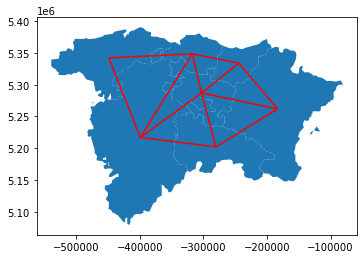

In [98]:
# visualize the edges

fig, ax = plt.subplots()
nuts_3_regions_of_interest.plot(ax=ax)
edges_gdf.plot(ax=ax, zorder=10, color="red")
# plt.savefig("case studies\Basque_country_1/geographic_extend.pdf")

In [99]:
destination_folder = "case studies\Basque_country_1/"



In [100]:
# create a file for transport activity
import pandas as pd
import yaml

# Sample DataFrame
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Paris', 'London']
})

# Convert DataFrame to dictionary
data_dict = df.to_dict(orient='records')

# Write the dictionary to a YAML file
with open('output.yaml', 'w') as file:
    yaml.dump(data_dict, file, default_flow_style=False)


# routes? -> doing this by hand


# Scaling of travel demand for the NUTS-3 regions

In [101]:
average_path_lengths = {
    "urban": {1: 8000, 2: 7000, 3: 60000, 4: 9000}, 
    "rural": {1: 12000, 2: 8000, 3: 60000, 4: 23000}
    }   # for now these are rough estimates not based on real data

mode_split = {
    "urban": 0.31,
    "rural": 0.57
}
# "region_urban", "region_nonurban", "interregional"
travel_demand = pd.DataFrame(columns=["from", "to", "type", "num_trips", "pkm", "veh_flow", "purpose", "path", "distance"])
# edited_flows.keys()
origins = edited_flows["ORIGINZONE_3_ID"].to_list()
destinations = edited_flows["DEST_ZONE_3_ID"].to_list()
paths = edited_flows["path"].to_list()
purposes = edited_flows["TRIP_PURPOSE_ID"].to_list()
trips = edited_flows["p_transport_car_trips"].to_list()
vehicle_flows = edited_flows["p_transport_car_vehicles"].to_list()
cities = pd.read_csv("temp_data/cities.csv")

# getting total population nbs. 
# Read the Excel file
excel_file = pd.ExcelFile('C:\PhD\Forschung\Basque_country\data/demo_r_pjangrp3_page_spreadsheet.xlsx')

# Read the first sheet
df_sheet1 = pd.read_excel(excel_file, sheet_name='Sheet 1', header=10)

# filter the sheet for the ones of interest
df_sheet1 = df_sheet1[df_sheet1["GEO (Codes)"].isin(etis_codes_nuts_3.keys())]

# Read the third sheet
# splitting the trips between urban and nonurban
for kl in range(len(origins)):
    temp_orig = reverse_etis_codes[origins[kl]]
    temp_dest = reverse_etis_codes[destinations[kl]]
    print(kl, origins[kl], destinations[kl])
    if temp_orig == temp_dest:
        temp_purpose = purposes[kl]
        temp_sheets = df_sheet1[df_sheet1["GEO (Codes)"] == temp_orig]
        total_population = temp_sheets["Unnamed: 20"].to_list()[0]
        temp_cities_df = cities[cities["NUTS_ID"] == temp_orig]
        if len(temp_cities_df) > 0:
            city_population = temp_cities_df["population"].sum()
        else:
            city_population = 0

        rural_population = total_population - city_population

        f_mode_ratio_urban = mode_split["urban"]/(mode_split["urban"] + mode_split["rural"])
        f_mode_ratio_rural = mode_split["rural"]/(mode_split["urban"] + mode_split["rural"])

        f_pip_ratio_urban = city_population/total_population
        f_pip_ratio_rural = rural_population/total_population

        f_tot_urban = f_mode_ratio_urban * f_pip_ratio_urban
        f_tot_rural = f_mode_ratio_rural * f_pip_ratio_rural

        f_urban = f_tot_urban/(f_tot_urban + f_tot_rural)
        f_rural = f_tot_rural/(f_tot_urban + f_tot_rural)

        # adding regional trips
        temp_df = pd.DataFrame({"from": [temp_orig], "to": [temp_dest], "type": ["region_urban"], "num_trips": [trips[kl] * f_urban],"pkm": [average_path_lengths["urban"][temp_purpose] * 2  * trips[kl] * f_urban], "veh_flow": [vehicle_flows[kl] * f_urban],"purpose": [temp_purpose], "path": [paths[kl]], "distance": [2*average_path_lengths["urban"][temp_purpose]]}) 
        travel_demand = pd.concat([travel_demand, temp_df], ignore_index=True)
        
        temp_df = pd.DataFrame({"from": [temp_orig], "to": [temp_dest], "type": ["region_rural"],"num_trips": [trips[kl] * f_rural], "pkm": [average_path_lengths["rural"][temp_purpose] * 2  * trips[kl] * f_rural], "veh_flow": [vehicle_flows[kl] * f_rural], "purpose": [temp_purpose], "path": [paths[kl]], "distance": [2*average_path_lengths["rural"][temp_purpose]]})
        travel_demand = pd.concat([travel_demand, temp_df], ignore_index=True)
    
    else:
        dist_etis_extract = distance_df[(distance_df["ORIGINZONE_3_ID"] == origins[kl]) & (distance_df["DEST_ZONE_3_ID"] == destinations[kl])]
        dist_etis = dist_etis_extract[distance_column].iloc[0]
        pkm = trips[kl] * dist_etis * 1000 * 2
        temp_df = pd.DataFrame({"from": [temp_orig], "to": [temp_dest], "type": ["interregional"], "num_trips": [trips[kl]], "pkm": [pkm], "veh_flow": [vehicle_flows[kl]], "purpose": [temp_purpose], "path": [paths[kl]], "distance": [dist_etis*1000 *2]})

        travel_demand = pd.concat([travel_demand, temp_df], ignore_index=True)

    # adding not regional trips

travel_demand.to_csv("temp_data/travel_demand.csv")
travel_demand_copy = travel_demand.copy()


c:\Users\golab\anaconda3\envs\gdal2\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


0 110020101 110020101
1 110020101 110020101
2 110020101 110020101
3 110020102 110020101
4 110020102 110020101
5 110020102 110020101
6 110020102 110020101
7 110020102 110020102
8 110020102 110020102
9 110020102 110020102
10 110020101 110020102
11 110020101 110020102
12 110020101 110020102
13 110020101 110020102
14 110020103 110020102
15 110020103 110020101
16 110020103 110020101
17 110020103 110020102
18 110020103 110020101
19 110020103 110020102
20 110020103 110020102
21 110020103 110020101
22 110020103 110020103
23 110020103 110020103
24 110020103 110020103
25 110020102 110020103
26 110020102 110020103
27 110020101 110020103
28 110020101 110020103
29 110020102 110020103
30 110020101 110020103
31 110020102 110020103
32 110020101 110020103


## 1st goal: vehicle stock sizing 

Objects to create:
* Odpair
* Path
* Mode
* Product
* Vehicletype
* Technology
* TechVehicle


-> which constraints? just like "B": vehicle stock sizing


In [102]:
y_init = 2020
Y = 31
pre_y = 25 
G = Y + pre_y 
cost_data = pd.read_excel('C:\PhD\Forschung\Basque_country\data\cost_car_parameters.xlsx', sheet_name='Overview_Ref')
technical_data = pd.read_excel('C:\PhD\Forschung\Basque_country\data\cost_car_parameters.xlsx', sheet_name='Config_Ref')

sizes = ["Car_s", "Car_m", "SUV"]

types = ["ICEV-g", "BEV"]
subv = {"ICEV-g": 0, "BEV": 4000}
cost_dict = {}
for t in types:

    for size in sizes:
        #retrieving the cost data from the table
        # print(cost_data.head())
        seeked_identifier = [str(y) + "_14610_" + str(size) + "_" + t for y in range(y_init, y_init + Y)]
        # seeked_identifier_BEV = [str(y) + "_14610_Car_" + str(size) + "_BEV" for y in range(2020, 2051)]        # print(seeked_identifier)
        print(str(y) + "_14610_Car_" + str(size) + "_" + t for y in range(y_init, y_init + Y))
        cost_cost_dict = {}
        cost_cost_dict["capital_cost"] = []
        extract_cost_data = cost_data[cost_data["Identifier"].isin(seeked_identifier)]
        extract_technical_data = technical_data[technical_data["Identifier"].isin(seeked_identifier)]
        car_cost_data = extract_cost_data.sort_values(by="Purchase Year\n[-]")
        car_technical_data = extract_technical_data.sort_values(by="Purchase Year\n[-]")
        cost_cost_dict["capital_cost"] = [c - subv[t] for c in car_cost_data["Manuf. cost\n[€]"].to_list()]
        cost_cost_dict["fuel_economy"] = car_cost_data["Fuel Economy \n[kWh/km]"].to_list()
        cost_cost_dict["fuel_costs"] = car_cost_data["Specif. fuel cost\n[€-ct/km]"].to_list()
        cost_cost_dict["maintenance_annual"] = car_cost_data["Annual maint. Cost\n[€]"].to_list()
        cost_cost_dict["maintenance_distance"] = car_cost_data["Specif. maint. cost\n[€-ct/km]"].to_list()
        
        if t == types[1]:
            cost_cost_dict["battery_capacity"] = car_technical_data["Storage1\n[kWh]"].to_list()
            cost_cost_dict["peak_charging"] = car_technical_data["DCDC-Bat\n[kW]"].to_list()
        else:
            cost_cost_dict["battery_capacity"] = [9999 for y in range(y_init, y_init + Y)]
            cost_cost_dict["peak_charging"] = [9999 for y in range(y_init, y_init + Y)]

        cost_dict[t + "_" + size] = cost_cost_dict


<generator object <genexpr> at 0x0000022920141510>
<generator object <genexpr> at 0x0000022920141510>
<generator object <genexpr> at 0x0000022920141510>
<generator object <genexpr> at 0x0000022920141510>
<generator object <genexpr> at 0x0000022920141510>
<generator object <genexpr> at 0x0000022920141510>


In [103]:
# function to calculate the costs of vehicle 
# preliminary sourc: https://www.check24.de/kfz-versicherung/automagazin/ratgeber/wertverlust-auto/
def calculate_vehicle_costs(vehicle_type, original_costs, age):
    current_resale_price = original_costs
    for y in range(1, age + 1):
        if y == 1:
            current_resale_price = current_resale_price * 0.25
        else:
            current_resale_price = current_resale_price * 0.05 
    return current_resale_price 

def scale_maintnace_costs(original_main_costs, age):
    maintenance_costs = original_main_costs
    for y in range(4, age + 1):
        if y in [4, 5]:
            maintenance_costs = maintenance_costs * 1.05
        else:
            maintenance_costs = maintenance_costs * 1.1

    return maintenance_costs


In [104]:
# creating second-hand market
from sympy import symbols, Eq, solve

# Define the variable for the unknown average age in the >10 years group
x = symbols('x')

# Define the weighted average equation
equation = Eq(0.336 * 2.5 + 0.159 * 8 + 0.504 * x, 12)

# Solve for x
average_age_over_10 = solve(equation, x)[0]
average_age_over_10.evalf()

second_hand_distribution = {"1_5": (0.336, 3), "6_10": (0.159, 8), "11_": (0.504, 20)}

# 


In [105]:
intital_vehicle_stock_list = []
technology_ids = {"ICEV-g": 1, "BEV": 2}
veh_counter = 0
tech_vehicle_list = []
vehicle_type_names = list(cost_dict.keys())
for ij in range(len(cost_dict.keys())):
    if len(vehicle_type_names[ij].split("_")) > 2:
        split_list = vehicle_type_names[ij].split("_")
        vht = split_list[1] + "_" + split_list[2]
    else:
        vht = vehicle_type_names[ij].split("_")[1]
    generation_inv_costs = [cost_dict[vehicle_type_names[ij]]["capital_cost"][0]] * pre_y + cost_dict[vehicle_type_names[ij]]["capital_cost"][0:Y]
    yearly_inv_costs = [[calculate_vehicle_costs(vehicle_type_names[ij], generation_inv_costs[el], y) for y in range(1, Y + 1)] for el in range(len(generation_inv_costs))]
    generation_dep_maintnance_costs = [cost_dict[vehicle_type_names[ij]]["maintenance_annual"][0]] * pre_y + cost_dict[vehicle_type_names[ij]]["maintenance_annual"][0:Y]
    # scaling this for the 
    yearly_maintnance_costs = [[scale_maintnace_costs(generation_dep_maintnance_costs[el], y) for y in range(1, Y + 1)] for el in range(len(generation_dep_maintnance_costs))]
    generation_dep_maintnance_costs_dist = [cost_dict[vehicle_type_names[ij]]["maintenance_distance"][0]] * pre_y + cost_dict[vehicle_type_names[ij]]["maintenance_distance"][0:Y]
    # scaling this for the 
    distance_maintnance_costs = [[scale_maintnace_costs(generation_dep_maintnance_costs_dist[el], y) for y in range(1, Y + 1)] for el in range(len(generation_dep_maintnance_costs_dist))]
    tech_vehicle_list.append(
        {
            "id":veh_counter,
            "name": vehicle_type_names[ij] + "_primarymarket",
            "vehicle_type": vht + "_passenger_car",
            "technology": technology_ids[vehicle_type_names[ij].split("_")[0]],
            # "capital_cost": yearly_inv_costs,
            "capital_cost": [cost_dict[vehicle_type_names[ij]]["capital_cost"][0]] * pre_y + cost_dict[vehicle_type_names[ij]]["capital_cost"][0:Y],
            "maintnanace_cost_annual": yearly_maintnance_costs,
            "maintnance_cost_distance": distance_maintnance_costs,
            "W":[1.4] * G,
            "spec_cons": [cost_dict[vehicle_type_names[ij]]["fuel_economy"][0]] *pre_y + cost_dict[vehicle_type_names[ij]]["fuel_economy"][0:Y],
            "Lifetime": [25] * G,
            "AnnualRange": [14600] * G,
            "products":["passenger"],
            "battery_capacity": [cost_dict[vehicle_type_names[ij]]["battery_capacity"][0]] * pre_y + cost_dict[vehicle_type_names[ij]]["battery_capacity"][0:Y],
            "peak_charging": [cost_dict[vehicle_type_names[ij]]["peak_charging"][0]] * pre_y + cost_dict[vehicle_type_names[ij]]["peak_charging"][0:Y],
        }
    )
    veh_counter += 1

# adding second-hand market
for sec_h_section in second_hand_distribution.keys():
# for sec_h_section in ["1_5"]:
    for ij in range(len(cost_dict.keys())):
        if len(vehicle_type_names[ij].split("_")) > 2:
            split_list = vehicle_type_names[ij].split("_")
            vht = split_list[1] + "_" + split_list[2]
        else:
            vht = vehicle_type_names[ij].split("_")[1]
        if "ICEV" in vehicle_type_names[ij]: 
            age = second_hand_distribution[sec_h_section][1]
            age = 0
            generation_dep_maintnance_costs = [cost_dict[vehicle_type_names[ij]]["maintenance_annual"][0]] * pre_y + cost_dict[vehicle_type_names[ij]]["maintenance_annual"][0:Y]
            # scaling this for the
            yearly_maintnance_costs = [[scale_maintnace_costs(generation_dep_maintnance_costs[el], y+age) for y in range(1, Y + 1)] for el in range(len(generation_dep_maintnance_costs))]
            generation_dep_maintnance_costs_dist = [cost_dict[vehicle_type_names[ij]]["maintenance_distance"][0]] * pre_y + cost_dict[vehicle_type_names[ij]]["maintenance_distance"][0:Y]
            # scaling this for the
            distance_maintnance_costs = [[scale_maintnace_costs(generation_dep_maintnance_costs_dist[el], y+age) for y in range(1, Y + 1)] for el in range(len(generation_dep_maintnance_costs_dist))]
            tech_vehicle_list.append(
                {
                    "id":veh_counter,
                    "name": vehicle_type_names[ij] + "_secondhand_" + sec_h_section,
                    "vehicle_type": vht + "_passenger_car",
                    "technology": technology_ids[vehicle_type_names[ij].split("_")[0]],
                    "capital_cost": [cost_dict[vehicle_type_names[ij]]["capital_cost"][0]] * pre_y + cost_dict[vehicle_type_names[ij]]["capital_cost"][0:Y],
                    "maintnanace_cost_annual": yearly_maintnance_costs,
                    "maintnance_cost_distance": distance_maintnance_costs,
                    "W":[1.4] * G,
                    "spec_cons": [cost_dict[vehicle_type_names[ij]]["fuel_economy"][0]] *pre_y + cost_dict[vehicle_type_names[ij]]["fuel_economy"][0:Y],
                    "Lifetime": [25 - age] * G,
                    "AnnualRange": [14600] * G,
                    "products":["passenger"],
                    "battery_capacity": [cost_dict[vehicle_type_names[ij]]["battery_capacity"][0]] * pre_y + cost_dict[vehicle_type_names[ij]]["battery_capacity"][0:Y],
                    "peak_charging": [cost_dict[vehicle_type_names[ij]]["peak_charging"][0]] * pre_y + cost_dict[vehicle_type_names[ij]]["peak_charging"][0:Y],
                }
            )
            veh_counter += 1

# # adding techvehicle that represent mode public_transport 
# tech_vehicle_list.append(
#     {
#         "id":veh_counter,
#         "name": "public_transport_bus_ff",
#         "vehicle_type": "bus",
#         "technology": 3,
#         "capital_cost": [80000] * G,
#         "maintnanace_cost_annual": yearly_maintnance_costs,
#         "maintnance_cost_distance": distance_maintnance_costs,
#         "W":[4000] * G,
#         "spec_cons": [0] * G,
#         "Lifetime": [25] * G,
#         "AnnualRange": [200000] * G,
#         "products":["passenger"],
#         "battery_capacity": [3000] * G,
#         "peak_charging": [1000] * G,
#     }
# )
# veh_counter += 1
# tech_vehicle_list.append(
#     {
#         "id":veh_counter,
#         "name": "public_transport_bus_el",
#         "vehicle_type": "bus",
#         "technology": 4,
#         "capital_cost": [80000] * G,
#         "maintnanace_cost_annual": yearly_maintnance_costs,
#         "maintnance_cost_distance": distance_maintnance_costs,
#         "W":[4000] * G,
#         "spec_cons": [1.6] * G,
#         "Lifetime": [25] * G,
#         "AnnualRange": [200000] * G,
#         "products":["passenger"],
#         "battery_capacity": [350] * G,
#         "peak_charging": [150] * G,
#     }
# )

# W and AnnualRange refer here to the effectivness of the public transport system

# tech_vehicle_list = [
#         {"id":1,
#         "name":"passenger car with combustion engine",
#         "vehicle_type":"passenger car",
#         "technology":"combustion engine",
#         "capital_cost": [ICEV_capital_cost[0]] * pre_y + ICEV_capital_cost[0:Y],
# #        "capital_cost": [ICEV_capital_cost[0]] * G,
#         "W":[1.2] * G,
#         "spec_cons": [ICEV_fuel_economy[0]] *pre_y + ICEV_fuel_economy[0:Y],
#         "Lifetime": [12] * G,
#         "AnnualRange": [14610] * G,
#         "products":["passenger"]
#         },
#         {"id":2,
#         "name":"battery electric passenger car",
#         "vehicle_type":"passenger car",
#         "technology":"battery electric",
#         # "capital_cost": [BEV_capital_cost[0]] * pre_y + BEV_capital_cost[0:Y],
#         "capital_cost": [BEV_capital_cost[0] - 7000] * G,
#         "W":[1.4] * G,
#         "spec_cons": [BEV_fuel_economy[0]] *pre_y + BEV_fuel_economy[0:Y],
#         "Lifetime": [12] * G,
#         "AnnualRange": [14610] * G,
#         "products":["passenger"],
#         }
#     ]

# create paths 
# travel_demand: id, name, length (distance), nodes(path)
travel_demand_copy = travel_demand_copy[["distance", "path", "type"]]
travel_demand_copy = travel_demand_copy.drop_duplicates(keep="first")

travel_demand_copy.to_csv("temp_data/filtered_paths.csv")

travel_demand_copy.reset_index(drop=True, inplace=True)
travel_demand_copy["id"] = travel_demand_copy.index
travel_demand_copy["name"] = [""] * len(travel_demand_copy)
travel_demand_copy= travel_demand_copy[["id", "name", "distance", "path"]]

path_list = []

for index, row in travel_demand_copy.iterrows():
    node_list = list(ast.literal_eval(row["path"])[0])
    origin = node_list[0]
    dest = node_list[-1]
    list_of_edges = []
    if not origin == dest:
        for i in range(len(node_list)-1):
            from_node = node_list[i]
            to_node = node_list[i+1]
            if not edges_gdf[(edges_gdf["from"] == from_node) & (edges_gdf["to"] == to_node)].empty:
                edge = edges_gdf[(edges_gdf["from"] == from_node) & (edges_gdf["to"] == to_node)]
                list_of_edges.append(int(edge["id"].to_list()[0]))
            else:
                edge = edges_gdf[(edges_gdf["from"] == to_node) & (edges_gdf["to"] == from_node)]
                list_of_edges.append(int(edge["id"].to_list()[0]))

        sequence_list = [origin] + list_of_edges + [dest]

    else:
        sequence_list = [origin]

    
    print(row["distance"]/1000)
    path = {
        "id": row["id"],
        "name": str(row["id"]),
        "length": row["distance"]/1000 * 2,
        "sequence": sequence_list,
    }
    path_list.append(path)

# create od_pairlist



14.0
16.0
18.0
46.0
16.0
24.0
198.0
14.0
16.0
18.0
46.0
16.0
24.0
198.0
194.0
126.0
14.0
16.0
18.0
46.0
16.0
24.0
194.0
126.0


Top 1% holds 10.02% of the national income.
Top 10% holds 33.13% of the national income.
Bottom 50% holds 20.08% of the national income.

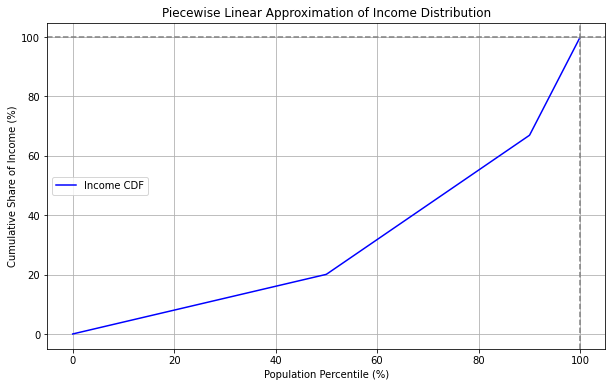

In [106]:
# old income classes

import numpy as np
import matplotlib.pyplot as plt

# Define the piecewise CDF function
def income_cdf(x):
    if 0 <= x <= 50:
        return 0.4016 * x
    elif 50 < x <= 90:
        return 1.16975 * x - 38.4075
    elif 90 < x <= 100:
        return 3.313 * x - 231.43
    else:
        raise ValueError("Percentile x must be between 0 and 100")

# Create a numpy array of population percentiles (0 to 100)
x_values = np.linspace(0, 100, 1000)

# Calculate the CDF for each percentile
cdf_values = np.array([income_cdf(x) for x in x_values])

# Plotting the CDF
plt.figure(figsize=(10, 6))
plt.plot(x_values, cdf_values, label="Income CDF", color="b")
plt.xlabel('Population Percentile (%)')
plt.ylabel('Cumulative Share of Income (%)')
plt.title('Piecewise Linear Approximation of Income Distribution')
plt.grid(True)
plt.axhline(y=100, color='gray', linestyle='--')
plt.axvline(x=100, color='gray', linestyle='--')
plt.legend()
plt.show()

# if girl == genuine and girl == kind:
#     love her

In [107]:
# new income classes
# Derivative of the CDF to get the income density based on new quintiles
# taken from https://doi.org/10.2908/ICW_RES_01
def income_density(x):
    """Returns the income density for a given percentile x based on quintile distribution."""
    if 0 <= x < 20:
        return 6.4
    elif 20 <= x < 40:
        return 12.6
    elif 40 <= x < 60:
        return 17.8
    elif 60 <= x < 80:
        return 24.2
    elif 80 <= x <= 100:
        return 39.0
    else:
        raise ValueError("Percentile x must be between 0 and 100")

# Example percentiles to check
percentiles = [10, 30, 50, 70, 90]  # Example percentiles to test across quintiles

# Compute the income density for each percentile
incomes = [income_density(p) for p in percentiles]

# Print the results
for p, income in zip(percentiles, incomes):
    print(f"Income at percentile {p}%: {income:.2f}")


Income at percentile 10%: 6.40
Income at percentile 30%: 12.60
Income at percentile 50%: 17.80
Income at percentile 70%: 24.20
Income at percentile 90%: 39.00


## Value of time 

In [108]:
import numpy as np

# including value of time
# data by tattini in DKK/h
exchange_rate = 0.13
def dkk_to_euro(dkk, exchange_rate=exchange_rate):
    return dkk * exchange_rate

prefix_names = ["First", "Second", "Third", "Fourth", "Fifth"]
class_names = [ el + " quintile" for el in prefix_names] + ["Commercial"]

values_dkk = [50.8,98.23,145.65,193.08,240.5, 240.5]
# Interpolating to get 5 values
#interpolated_values = np.interp(np.linspace(0, 4, 5), np.arange(4), values_dkk)
# Converting interpolated values to euros
values_euro = [dkk_to_euro(value) for value in values_dkk]

values_of_lost_time_by_ic = {}
for ij in range(len(class_names)):
    class_name = class_names[ij]
    values_of_lost_time_by_ic[class_name] = values_euro[ij]

print(values_of_lost_time_by_ic)
# values_dkk = {"bottom_50": dkk_to_euro((50.8+87.6)/2), "middle_50_90": dkk_to_euro(145.9), "upper_10": dkk_to_euro(240.5), "commercial": dkk_to_euro(240.5)}



{'First quintile': 6.604, 'Second quintile': 12.769900000000002, 'Third quintile': 18.9345, 'Fourth quintile': 25.100400000000004, 'Fifth quintile': 31.265, 'Commercial': 31.265}


## Level of service

In [109]:
# level of service
# given per technology and mode + route 
# I need: average driving speed

speed_dict = {"urban": 30, "rural": 60}

def calculate_los_passenger_car(average_speed, route_length, driving_range, charging_power, battery_capacity, spec_consumption):
    # charging_time only calculated with route_length > driving range
    free_flow_travel_time = route_length/average_speed
    charging_time = 0
    if route_length * spec_consumption > battery_capacity * 0.8:
        charging_time = battery_capacity * 0.8 / charging_power
    
    return free_flow_travel_time + charging_time

# this 
        

## Monetary budget

Data sources:
* icw_res_02 (https://doi.org/10.2908/ICW_RES_02): Average/median displosable income per person
* icw_aff_01 (https://doi.org/10.2908/ICW_AFF_01): Shares of expenditures for each expense category 

In [110]:
# getting the data 
source = "C:\PhD\Forschung\Basque_country\data\EUROSTAT/"
filename_expenditures = "icw_aff_01__custom_13506706_spreadsheet.xlsx"
filename_income= "icw_res_02__custom_13535828_spreadsheet.xlsx"
average_income_dict = {}
transport_7_expenses_perc_by_country_by_ic = {}
transport_71_expenses_perc_by_country_by_ic = {}
transport_72_expenses_perc_by_country_by_ic = {}
transport_73_expenses_perc_by_country_by_ic = {}
sheet_codes_income = {
    "First quintile": "Sheet 3",
    "Second quintile": "Sheet 6",
    "Third quintile": "Sheet 9",
    "Fourth quintile": "Sheet 12",
    "Fifth quintile": "Sheet 15",
}

# transport (07)
transport_7_expenditure_shares = pd.read_excel(source + filename_expenditures, sheet_name="Sheet 2", header=9)
transport_7_expenditure_shares = transport_7_expenditure_shares.drop(0)
transport_7_expenditure_shares = transport_7_expenditure_shares.iloc[:-5]
transport_7_expenditure_shares.set_index("QUANT_INC (Labels)", inplace=True)
for column in transport_7_expenditure_shares.columns:
    transport_7_expenses_perc_by_country_by_ic[column] = transport_7_expenditure_shares[column].to_dict()

# om costs (07.2)
transport_72_expenditure_shares = pd.read_excel(source + filename_expenditures, sheet_name="Sheet 4", header=9)
transport_72_expenditure_shares = transport_72_expenditure_shares.drop(0)
transport_72_expenditure_shares = transport_72_expenditure_shares.iloc[:-5]
transport_72_expenditure_shares.set_index("QUANT_INC (Labels)", inplace=True)
for column in transport_72_expenditure_shares.columns:
    transport_72_expenses_perc_by_country_by_ic[column] = transport_72_expenditure_shares[column].to_dict()

# transport services (07.3)
transport_73_expenditure_shares = pd.read_excel(source + filename_expenditures, sheet_name="Sheet 6", header=9)
transport_73_expenditure_shares = transport_73_expenditure_shares.drop(0)
transport_73_expenditure_shares = transport_73_expenditure_shares.iloc[:-5]
transport_73_expenditure_shares.set_index("QUANT_INC (Labels)", inplace=True)
for column in transport_73_expenditure_shares.columns:
    transport_73_expenses_perc_by_country_by_ic[column] = transport_73_expenditure_shares[column].to_dict()


# average income
for ic in sheet_codes_income.keys():
    average_income = pd.read_excel(source + filename_income, sheet_name=sheet_codes_income[ic], header=12)
    average_income = average_income.drop(0)
    average_income = average_income.iloc[:-5]
    average_income.set_index("INDIC_IL (Labels)", inplace=True)

    average_income = average_income[["Disposable income"]]

    average_income_dict[ic] = average_income["Disposable income"].to_dict()

print(average_income_dict)

c:\Users\golab\anaconda3\envs\gdal2\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


{'First quintile': {'Belgium': 18600.4, 'Bulgaria': 2413.2, 'Czechia': 7621.9, 'Denmark': 18284.5, 'Germany': 12472.2, 'Estonia': 5707.0, 'Ireland': ':', 'Greece': 6107.4, 'Spain': 9830.3, 'France': 16227.7, 'Croatia': 4460.5, 'Italy': ':', 'Cyprus': 13921.6, 'Latvia': 3814.0, 'Lithuania': 4508.1, 'Luxembourg': 34354.0, 'Hungary': 4653.0, 'Malta': 11034.0, 'Netherlands': 16320.7, 'Austria': 17597.6, 'Poland': 6427.0, 'Portugal': ':', 'Romania': 2483.3, 'Slovenia': 8932.3, 'Slovakia': 7931.1, 'Finland': ':', 'Sweden': ':', 'United Kingdom': ':'}, 'Second quintile': {'Belgium': 27357.2, 'Bulgaria': 4260.6, 'Czechia': 12481.4, 'Denmark': 31348.0, 'Germany': 25250.4, 'Estonia': 10851.5, 'Ireland': ':', 'Greece': 11060.5, 'Spain': 19195.6, 'France': 25658.4, 'Croatia': 9218.4, 'Italy': ':', 'Cyprus': 21243.1, 'Latvia': 8066.5, 'Lithuania': 8890.5, 'Luxembourg': 50762.8, 'Hungary': 7770.8, 'Malta': 19164.0, 'Netherlands': 27013.7, 'Austria': 32409.5, 'Poland': 11086.1, 'Portugal': ':', 'Roma

In [111]:
# temporary pseudo code
country = "Spain"
error = 0.3
income_classes = class_names


def get_numeric_values(dict_of_dicts):
    values = [value for value in dict_of_dicts.values() if isinstance(value, (int, float))]
    return np.array(values)

# Example usage
# transport_7_expenses_array = dict_to_numpy_array(transport_7_expenses_perc_by_country_by_ic)
#print(transport_7_expenses_array)

ic_monetary_budget_purchase = {}
ic_monetary_budget_purchase_lb = {}
ic_monetary_budget_purchase_ub = {}
ic_monetary_budget_operational = {}
ic_monetary_budget_operational_lb = {}
ic_monetary_budget_operational_ub = {}
#print(income_classes)
for ic in income_classes: 
    if ic != "Commercial":
        average_income = average_income_dict[ic][country]
        transport_expenses_perc_by_country = transport_7_expenses_perc_by_country_by_ic[ic]
        # scaling_7_72 = np.average(get_numeric_values(transport_72_expenses_perc_by_country_by_ic[ic]))/np.average(get_numeric_values(transport_7_expenses_perc_by_country_by_ic[ic]))
        adjusted_transport_expenses_perc = transport_72_expenses_perc_by_country_by_ic[ic][country] +  transport_73_expenses_perc_by_country_by_ic[ic][country]
        average_operational = transport_72_expenses_perc_by_country_by_ic[ic][country]/100 * average_income
        average_purchase = adjusted_transport_expenses_perc - 0.6 * transport_72_expenses_perc_by_country_by_ic[ic][country] - 0.6 * transport_73_expenses_perc_by_country_by_ic[ic][country]

        average_purchase = np.abs(average_purchase/100 * average_income)
        # print(average_purchase, adjusted_transport_expenses_perc, average_operational, transport_73_expenses_perc_by_country_by_ic[ic][country])
        print(ic, average_purchase, adjusted_transport_expenses_perc, average_purchase, transport_expenses_perc_by_country[country], transport_73_expenses_perc_by_country_by_ic[ic][country])

        lb_purchase = average_purchase - error * average_purchase
        ub_purchase = average_purchase + error * average_purchase
        lb_operational = average_operational - error * average_operational
        ub_operational = average_operational + error * average_operational
        ic_monetary_budget_purchase[ic] = average_purchase
        ic_monetary_budget_purchase_lb[ic] = lb_purchase
        ic_monetary_budget_purchase_ub[ic] = ub_purchase
        ic_monetary_budget_operational[ic] = average_operational
        ic_monetary_budget_operational_lb[ic] = lb_operational
        ic_monetary_budget_operational_ub[ic] = ub_operational
       

First quintile 397.1441199999999 10.1 397.1441199999999 8.5 3.1
Second quintile 522.1203199999999 6.8 522.1203199999999 6.8 1.3
Third quintile 566.5420799999999 5.2 566.5420799999999 5.1 0.8
Fourth quintile 621.0691200000001 4.2 621.0691200000001 4.6 0.7
Fifth quintile 714.8232 3.0 714.8232 3.4 0.5


In [112]:
def categorize_trips(total_people):
    # Calculate the number of people in each 20% quantile
    quantile_size = total_people // 5  # Each quantile represents 20%
    
    # Calculate remaining people due to integer division
    remainder = total_people - (quantile_size * 5)
    
    # Distribute remainder to ensure the total adds up to total_people
    # Distribute extra one person in each quantile up to the remainder
    quantiles = {
        "First quintile": quantile_size + (1 if remainder > 0 else 0),
        "Second quintile": quantile_size + (1 if remainder > 1 else 0),
        "Third quintile": quantile_size + (1 if remainder > 2 else 0),
        "Fourth quintile": quantile_size + (1 if remainder > 3 else 0),
        "Fifth quintile": quantile_size + (1 if remainder > 4 else 0)
    }
    
    return quantiles

In [113]:
print(categorize_trips(1000))

{'First quintile': 200, 'Second quintile': 200, 'Third quintile': 200, 'Fourth quintile': 200, 'Fifth quintile': 200}


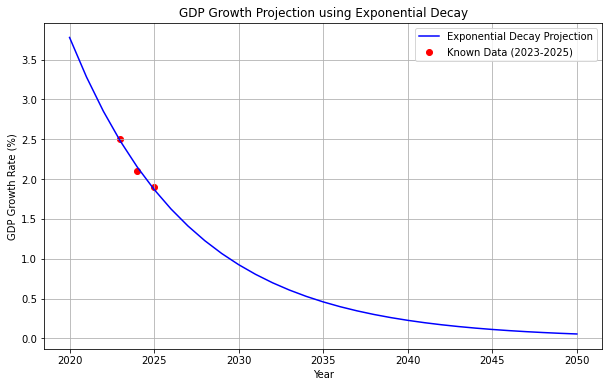

   Year  GDP Growth (Exponential Decay)
0  2020                        3.777547
1  2021                        3.281952
2  2022                        2.851376
3  2023                        2.477289
4  2024                        2.152281
5  2025                        1.869912
6  2026                        1.624589
7  2027                        1.411451
8  2028                        1.226275
9  2029                        1.065394
    Year  GDP Growth (Exponential Decay)
21  2041                        0.197050
22  2042                        0.171198
23  2043                        0.148738
24  2044                        0.129224
25  2045                        0.112271
26  2046                        0.097541
27  2047                        0.084744
28  2048                        0.073626
29  2049                        0.063967
30  2050                        0.055575
[3.77754719 3.28195151 2.85137556 2.47728906 2.15228088 1.86991218
 1.62458887 1.41145077 1.22627535 1.065394

In [114]:
# map relative gpd change
spainish_growth = {2023: 2.5, 2024: 2.1, 2025: 1.9}
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Step 1: Define the exponential decay function
def exp_decay(x, a, b):
    return a * np.exp(-b * x)

# Step 2: Known GDP growth data (for 2023, 2024, 2025)
known_years = np.array([2023, 2024, 2025]) - 2023  # Shift years to start from 0 (i.e., 2023 is year 0)
known_growth_rates = np.array([2.5, 2.1, 1.9])

# Step 3: Fit the exponential decay function to the known data
params, _ = curve_fit(exp_decay, known_years, known_growth_rates)

# Unpack the fitted parameters a (initial value) and b (decay rate)
a_exp, b_exp = params

# Step 4: Define the years for prediction (2020-2050), shifted to start from 2023
predict_years = np.arange(2020, 2051) - 2023

# Step 5: Predict GDP growth using the fitted exponential decay model
predicted_growth_exp = exp_decay(predict_years, a_exp, b_exp)

# Step 6: Create a DataFrame to store the predicted values
exp_growth_df = pd.DataFrame({
    'Year': np.arange(2020, 2051),
    'GDP Growth (Exponential Decay)': predicted_growth_exp
})
# Create a dictionary with years as keys and GDP growth rates afs values
exp_growth_dict = exp_growth_df.set_index('Year')['GDP Growth (Exponential Decay)'].to_dict()

# Step 7: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(exp_growth_df['Year'], exp_growth_df['GDP Growth (Exponential Decay)'], label='Exponential Decay Projection', color='blue')
plt.scatter([2023, 2024, 2025], known_growth_rates, color='red', label='Known Data (2023-2025)')
plt.title('GDP Growth Projection using Exponential Decay')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Optionally, print or export the predicted data
print(exp_growth_df.head(10))  # View first 10 years of predictions
print(exp_growth_df.tail(10))  # View last 10 years of predictions

print(predicted_growth_exp)

In [115]:
import numpy as np

def calculate_gdp(base_gdp_2020, growth_rates, start_year=2020):
    """
    Calculate the GDP values for a range of years based on a base GDP in 2020 and growth rates.
    
    :param base_gdp_2020: The base GDP value for the year 2020.
    :param growth_rates: A dictionary with years as keys and growth rates (%) as values.
    :param start_year: The year from which the base GDP is provided (default is 2020).
    :return: A dictionary with years as keys and corresponding GDP values as values.
    """
    # Initialize the GDP dictionary with the base value for 2020
    gdp_values = {start_year: base_gdp_2020}
    
    # Calculate GDP for future years
    for year in range(start_year + 1, max(growth_rates.keys()) + 1):
        gdp_values[year] = gdp_values[year - 1] * (1 + growth_rates[year] / 100)
    
    # Calculate GDP for past years
    for year in range(start_year - 1, min(growth_rates.keys()) - 1, -1):
        gdp_values[year] = gdp_values[year + 1] / (1 + growth_rates[year + 1] / 100)
    
    return gdp_values

# Example usage:

# Define the base GDP value for 2020
base_gdp_2020 = 1000  # You can adjust this to any base value

# Define growth rates (for example, the values from exponential decay or your projected model)
# This should be a dictionary with year as key and growth rate as value
# growth_rates = {2020: 3.4, 2021: 3.1, 2022: 2.8, 2023: 2.5, 2024: 2.1, 2025: 1.9, 
#                 2026: 1.6, 2027: 1.3, 2028: 1.0, 2029: 0.7, 2030: 0.4, 2031: 0.1}

growth_rates = exp_growth_dict
# Calculate GDP values from the base value in 2020
gdp_values = calculate_gdp(base_gdp_2020, growth_rates)
print(gdp_values)
# Print the GDP values
for year, gdp in sorted(gdp_values.items()):
    print(f"GDP in {year}: {gdp:.2f}")


{2020: 1000, 2021: 1032.8195151358393, 2022: 1062.2690783811443, 2023: 1088.5845540820656, 2024: 1112.0139513056515, 2025: 1132.807635602157, 2026: 1151.2111023168209, 2027: 1167.4598802736598, 2028: 1181.7761529623917, 2029: 1194.3667255587977, 2030: 1205.4220175441276, 2031: 1215.1158141647832, 2032: 1223.6055606028613, 2033: 1231.0330279406376, 2034: 1237.5252187578594, 2035: 1243.195412408317, 2036: 1248.1442761290202, 2037: 1252.4609888538648, 2038: 1256.2243407376782, 2039: 1259.5037837378857, 2040: 1262.3604178741787, 2041: 1264.8479046233986, 2042: 1267.0133038404806, 2043: 1268.897834065207, 2044: 1270.537558432303, 2045: 1271.9639999295102, 2046: 1273.2046906639935, 2047: 1274.28366027108, 2048: 1275.2218687600628, 2049: 1276.037589036987, 2050: 1276.7467441465126}
GDP in 2020: 1000.00
GDP in 2021: 1032.82
GDP in 2022: 1062.27
GDP in 2023: 1088.58
GDP in 2024: 1112.01
GDP in 2025: 1132.81
GDP in 2026: 1151.21
GDP in 2027: 1167.46
GDP in 2028: 1181.78
GDP in 2029: 1194.37
GDP 

In [116]:
# generate the distrvbution sof vehicle types

# from Anuario Estadistica General 2023
distribution_2023 = {"Car_s_passenger_car": 4.5 + 0.5* 10.4, "Car_m_passenger_car": 0.5 * 10.4 + 18.1, "SUV_passenger_car": 2.3, "bus": 0}
total_value = sum(distribution_2023.values())
distribution_shares_2023 = {key: value / total_value for key, value in distribution_2023.items()}
print(distribution_shares_2023)

{'Car_s_passenger_car': 0.2747875354107649, 'Car_m_passenger_car': 0.6600566572237961, 'SUV_passenger_car': 0.06515580736543909, 'bus': 0.0}


In [ ]:
elec_rate_2020 = 0.01
travel_demand_copy_2 = travel_demand.copy()
travel_demand_copy_2 = travel_demand_copy_2[["from", "to", "path", "num_trips", "type", "purpose"]]
travel_demand_copy_2["product"] = ["passenger"] * len(travel_demand_copy_2)
travel_demand_copy_2.rename(columns={"path": "paths"}, inplace=True)
travel_demand_copy_2["id"] = travel_demand_copy_2.index
travel_demand_copy_2.rename(columns={"num_trips": "F"}, inplace=True)
travel_demand_copy_2["product"] = ["passenger"] * len(travel_demand_copy_2)
travel_demand_copy_2["path_id"] = travel_demand_copy_2["paths"].apply(lambda x: travel_demand_copy.loc[travel_demand_copy["path"] == x, "id"].values[0])

total_vehs = 0
total_vehs_2 = 0
total_vehs_3 = 0
total_vehs_4 = 0
total_vehs_5 = 0
counter_ivs = 0
td_id = 0
odpair_list = []
f_init_by_mode_list = []
f_initial_mode_share = {1: 100, 2:0}  # % 
f_init_counter = 0
for index, row in travel_demand_copy_2.iterrows():
    purpose = row["purpose"]

    # calculate initital vehicle stock
    tv_id = 1
    F = row["F"] * 1.1 
    # TODO differentiation in km and nb of vehicles 
    tech_vehicle = next((item for item in tech_vehicle_list if item["id"] == tv_id), None)
    dist = next((item for item in path_list if item["id"] == row["path_id"]), None)
    lifetime = tech_vehicle["Lifetime"][0]
    vehicles = F *((dist["length"])/(tech_vehicle["W"][0] * tech_vehicle["AnnualRange"][0]))
    total_vehs = total_vehs + vehicles

    if row["type"] == "region_urban":
        urban = True
    else:
        urban = False 

    # categorizing by finansial status 
    
    cat_F = categorize_trips(F)
    cat_vehs = [cat_F[key] *((dist["length"])/(tech_vehicle["W"][0] * tech_vehicle["AnnualRange"][0])) for key in cat_F.keys()]
    cat_vehs_dict = {key: cat_vehs[i] for i, key in enumerate(cat_F.keys())}
    total_vehs_2 = total_vehs_2 + sum(cat_vehs)
    if purpose == 1:
        
        grown_values = calculate_gdp(F, growth_rates)
            
        small_vehs = F * ((dist["length"])/(tech_vehicle["W"][0] * tech_vehicle["AnnualRange"][0]))
        total_vehs_4 += small_vehs

        vehicle_stock_init_list = []
            
        nb_types = 3
        # nb_types = len(tech_vehicle_list)
        for entry in tech_vehicle_list:
            tv_id = entry["id"]
            distr_share = distribution_shares_2023[entry["vehicle_type"]]
            if entry["technology"] == 1 and entry in tech_vehicle_list[0:6]:
                total_vehs_5 += (small_vehs/nb_types) * (1-elec_rate_2020)

                for g in range(y_init - entry["Lifetime"][0], y_init):
                    vehicle_stock_entry = {"id": counter_ivs, "techvehicle": tv_id, "year_of_purchase": g, "stock": round(small_vehs * distr_share * (1-elec_rate_2020) * (1/entry["Lifetime"][0]), 2)}
                    intital_vehicle_stock_list.append(vehicle_stock_entry)
                    vehicle_stock_init_list.append(counter_ivs)
                    counter_ivs += 1
                    total_vehs_3 += (small_vehs/1) * distr_share * (1-elec_rate_2020) * (1/entry["Lifetime"][0])
            
            elif entry in tech_vehicle_list[0:6]:
                total_vehs_5 += (small_vehs/nb_types) * (elec_rate_2020)
                for g in range(y_init-pre_y, y_init):
                    vehicle_stock_entry = {"id": counter_ivs, "techvehicle": tv_id, "year_of_purchase": g, "stock": round((small_vehs/1) * distr_share* (elec_rate_2020) * (1/entry["Lifetime"][0]), 2)}
                    intital_vehicle_stock_list.append(vehicle_stock_entry)
                    vehicle_stock_init_list.append(counter_ivs)
                    counter_ivs += 1
                    total_vehs_3 += (small_vehs/1)  * distr_share * (elec_rate_2020) * (1/entry["Lifetime"][0])
            else:
                for g in range(y_init-pre_y, y_init):
                    vehicle_stock_entry = {"id": counter_ivs, "techvehicle": tv_id, "year_of_purchase": g, "stock": 0}
                    intital_vehicle_stock_list.append(vehicle_stock_entry)
                    vehicle_stock_init_list.append(counter_ivs)
                    counter_ivs += 1
                    total_vehs_3 += 0

        print(total_vehs_5, total_vehs_3, total_vehs_4)
        F_growth = [round(grown_values[y], 2) for y in range(y_init, y_init + Y)]
        f_init_by_mode_id_list = []
        for mode_id in f_initial_mode_share.keys():
            f_init_by_mode = {
                "id": f_init_counter,
                "mode": mode_id,
                "share": f_initial_mode_share[mode_id],
                "f_init": F_growth[0] * f_initial_mode_share[mode_id]
            }
            f_init_by_mode_id_list.append(f_init_counter)
            f_init_counter += 1

        if urban:
            region_type = "urban"
        else:
            region_type = "rural"            
        od_pair = {
            "id": td_id,
            "from": row["from"],
            "to": row["to"],
            "path_id": row["path_id"],
            "product": row["product"],
            "F": F_growth,
            "f_init_by_mode": f_init_by_mode_id_list,
            "vehicle_stock_init": vehicle_stock_init_list,
            "region_type": region_type,
            "financial_status":"Commercial"
        }
        td_id += 1
        odpair_list.append(od_pair)

    else:    
        for key in cat_F.keys():
            small_vehs = cat_vehs_dict[key]

            # total_vehs = total_vehs + small_vehs
            total_vehs_4 = total_vehs_4 + small_vehs
            vehicle_stock_init_list = []
            
            nb_types = 3
            # nb_types = len(tech_vehicle_list)
            for entry in tech_vehicle_list:
                tv_id = entry["id"]
                distr_share = distribution_shares_2023[entry["vehicle_type"]]

                if entry["technology"] == 1 and entry in tech_vehicle_list[0:6]:
                    total_vehs_5 += (small_vehs/nb_types) * (1-elec_rate_2020)

                    for g in range(y_init - entry["Lifetime"][0], y_init):
                        vehicle_stock_entry = {"id": counter_ivs, "techvehicle": tv_id, "year_of_purchase": g, "stock": round((small_vehs/1) * distr_share * (1-elec_rate_2020) * (1/entry["Lifetime"][0]), 2)}
                        intital_vehicle_stock_list.append(vehicle_stock_entry)
                        vehicle_stock_init_list.append(counter_ivs)
                        counter_ivs += 1
                        total_vehs_3 += (small_vehs/1)  * distr_share* (1-elec_rate_2020) * (1/entry["Lifetime"][0])
                elif entry in tech_vehicle_list[0:6]:
                    total_vehs_5 += (small_vehs/nb_types) * (elec_rate_2020)
                    for g in range(y_init-pre_y, y_init):
                        vehicle_stock_entry = {"id": counter_ivs, "techvehicle": tv_id, "year_of_purchase": g, "stock": round((small_vehs/1) * distr_share * (elec_rate_2020) * (1/entry["Lifetime"][0]), 2)}
                        intital_vehicle_stock_list.append(vehicle_stock_entry)
                        vehicle_stock_init_list.append(counter_ivs)
                        counter_ivs += 1
                        total_vehs_3 += (small_vehs/1)  * distr_share * (elec_rate_2020) * (1/entry["Lifetime"][0])
                else:
                    for g in range(y_init-pre_y, y_init):
                        vehicle_stock_entry = {"id": counter_ivs, "techvehicle": tv_id, "year_of_purchase": g, "stock": 0}
                        intital_vehicle_stock_list.append(vehicle_stock_entry)
                        vehicle_stock_init_list.append(counter_ivs)
                        counter_ivs += 1
                        total_vehs_3 += 0

            print(total_vehs_5, total_vehs_3, total_vehs_4)

            grown_values = calculate_gdp(cat_F[key], growth_rates)
            

            F_growth = [round(grown_values[y], 2) for y in range(y_init, y_init + Y)]
            f_init_by_mode_id_list = []
            for mode_id in f_initial_mode_share.keys():
                f_init_by_mode = {
                    "id": f_init_counter,
                    "mode": mode_id,
                    "share": f_initial_mode_share[mode_id],
                    "f_init": F_growth[0] * f_initial_mode_share[mode_id]
                }
                f_init_by_mode_id_list.append(f_init_counter)
                f_init_counter += 1

            
            if urban:
                region_type = "urban"
            else:
                region_type = "rural"    

            od_pair = {
                "id": td_id,
                "from": row["from"],
                "to": row["to"],
                "path_id": row["path_id"],
                "product": row["product"],
                "F": F_growth,
                "f_init_by_mode": f_init_by_mode_id_list,
                "vehicle_stock_init": vehicle_stock_init_list,
                "region_type": region_type,
                "financial_status":key
            }

            td_id += 1
            odpair_list.append(od_pair)
        if row["id"] == 0:
            print(vehicles, small_vehs, 842 * 12)

# create a list of dictionaries with id and name from reverse_etis_codes_nuts_3
node_list = [{"id": idx, "name": key} for idx, key in enumerate(etis_codes_nuts_3.keys())]

print(total_vehs, total_vehs_2, total_vehs_3, total_vehs_4, total_vehs_5)
print(td_id)
print(len(odpair_list))

7625.083561643835 7625.083561643821 7625.083561643835
15250.16575342466 15250.165753424624 15250.165753424657
22875.247945205476 22875.24794520552 22875.24794520548
30500.33013698629 30500.330136986413 30500.3301369863
38125.4123287671 38125.412328767125 38125.412328767125
38125.41230586099 7625.082191780822 10104
43028.04383561641 43028.043835616445 43028.04383561644
47930.675342465714 47930.675342465765 47930.67534246575
52833.30684931502 52833.306849315086 52833.306849315064
57735.93698630131 57735.93698630131 57735.93698630136
62638.567123287605 62638.56712328754 62638.56712328766
66244.73698630132 66244.73698630129 66244.73698630136
69850.90684931501 69850.90684931485 69850.90684931506
73457.07534246567 73457.07534246532 73457.07534246575
77063.24383561633 77063.2438356158 77063.24383561643
80669.412328767 80669.41232876627 80669.41232876712
82988.03835616424 82988.03835616338 82988.03835616438
85306.66438356148 85306.66438356049 85306.66438356164
87625.29041095873 87625.290410957

In [118]:
print(len(types))
print(tech_vehicle_list[0].keys())

2
dict_keys(['id', 'name', 'vehicle_type', 'technology', 'capital_cost', 'maintnanace_cost_annual', 'maintnance_cost_distance', 'W', 'spec_cons', 'Lifetime', 'AnnualRange', 'products', 'battery_capacity', 'peak_charging'])


In [ ]:
financial_status_list = []
meaningless_output = categorize_trips(1000)
weights = {"upper_10": 1, "middle_50_90":50, "bottom_50": 100}


counter = 0
for key in meaningless_output.keys():
    print(ic_monetary_budget_purchase[key])
    print(ic_monetary_budget_purchase_lb[key])
    financial_status = {
        "id": counter,
        "name": key,
        # "weight": weights[key]
        "VoT": values_of_lost_time_by_ic[key],
        "monetary_budget_operational": ic_monetary_budget_operational[key],
        "monetary_budget_operational_lb": ic_monetary_budget_operational_lb[key],
        "monetary_budget_operational_ub": ic_monetary_budget_operational_ub[key],
        "monetary_budget_purchase": float(ic_monetary_budget_purchase[key]),
        "monetary_budget_purchase_lb": float(ic_monetary_budget_purchase_lb[key]),
        "monetary_budget_purchase_ub": float(ic_monetary_budget_purchase_ub[key]),
    }
    counter += 1
    financial_status_list.append(financial_status)
key = "Fifth quintile"
financial_status_list.append(
    {"id": counter, 
    "name": "Commercial", 
    "VoT": values_of_lost_time_by_ic[key], 
    "monetary_budget_operational": ic_monetary_budget_operational[key],
    "monetary_budget_operational_lb": ic_monetary_budget_operational_lb[key],
    "monetary_budget_operational_ub": ic_monetary_budget_operational_ub[key],
    "monetary_budget_purchase": float(ic_monetary_budget_purchase[key]),
    "monetary_budget_purchase_lb": float(ic_monetary_budget_purchase_lb[key]),
    "monetary_budget_purchase_ub": float(ic_monetary_budget_purchase_ub[key]),
    }
)
print(type(ic_monetary_budget_purchase[key]))
print(type(ic_monetary_budget_purchase_lb[key]))
print(float(ic_monetary_budget_purchase[key]))

397.1441199999999
278.0008839999999
522.1203199999999
365.4842239999999
566.5420799999999
396.57945599999994
621.0691200000001
434.7483840000001
714.8232
500.37624000000005
<class 'numpy.float64'>
<class 'numpy.float64'>
714.8232


In [ ]:
vehicle_type_list = []
sizes_order = {"Car_s":1, "Car_m":2, "SUV":3}

for ij in range(len(sizes)):
    vehicle_type_list.append(
        {
            "id": ij,
            "name": sizes[ij] + "_" + "passenger_car",
            "mode": 1,
            "product": "passenger"
        }
    )

# adding vehicles representing the capacity of public transport
vehicle_type_list.append(
    {
        "id": len(sizes),
        "name": "bus",
        "mode": 2,
        "product": "passenger"
    }
)

In [121]:
# including maximum market shares
initiale_market_share = 2.3/(2.3 + 4.5 + 18.4)
growth_rate = 0.05
market_shares = [initiale_market_share * (1 + growth_rate) ** year for year in range(Y)]
print(market_shares)


[0.09126984126984126, 0.09583333333333333, 0.10062499999999999, 0.10565625000000001, 0.11093906250000002, 0.11648601562500002, 0.12231031640625004, 0.12842583222656254, 0.13484712383789066, 0.1415894800297852, 0.14866895403127445, 0.15610240173283818, 0.16390752181948012, 0.17210289791045413, 0.18070804280597685, 0.1897434449462757, 0.19923061719358948, 0.20919214805326897, 0.2196517554559324, 0.23063434322872906, 0.2421660603901655, 0.2542743634096738, 0.2669880815801575, 0.2803374856591654, 0.29435435994212367, 0.30907207793922986, 0.32452568183619135, 0.34075196592800094, 0.357789564224401, 0.3756790424356211, 0.3944629945574022]


In [ ]:
import yaml
            
data = {
    "TechVehicle": tech_vehicle_list,
    "Vehicletype":vehicle_type_list,
    "Mode":[ 
        {"id":1,
        "name":"car",
        "quantify_by_vehs": True,
        "max_share": 1,
        "costs_per_ukm": [999] * Y,
        "emission_factor": [0.0] * Y 
        },
        {"id":2,
        "name":"public_transport",
        "quantify_by_vehs": False,
        "max_share": 0.1,
        "costs_per_ukm": [0.12] * Y,
        "emission_factor": [0.0] * Y 
        }
    ],
    "Technology":[
        {"id":1,
        "name":"ICEV-g",
        "fuel": "diesel",
        },
        {"id":2,
         "name":"BEV",
         "fuel": "electricity"
         },
         {"id":3,
         "name":"fossilfueled",
         "fuel": "diesel"
         },
         {"id":4,
         "name":"electrified",
         "fuel": "electricity"
         },
    ],
    "Fuel":[
        {"id":1,
        "name":"diesel",
        "cost_per_kWh":  cost_dict["ICEV-g_Car_s"]["fuel_costs"],
        "cost_per_kW": [10] * Y,
        "emission_factor": [0.0] * Y
        },
        {"id":2,
         "name":"electricity",
         "cost_per_kWh": cost_dict["BEV_Car_s"]["fuel_costs"],
         "cost_per_kW": [350] * Y,
         "emission_factor": [0.0] * Y
        }
    ],
    "Product":[
        {"id":1,
        "name":"passenger",
        }
    ],
    "Regiontypes":[
        {"id":1,
        "name":"urban",
        # "weight": [1000, 500, 1],
        "speed": 30,
        "costs_var": [0] * Y,
        "costs_fix": [120] * Y, # €/year
            },
        {"id":2,
         "name":"rural",
        "speed": 60,
        "costs_var": [0] * Y,
        "costs_fix": [0] * Y, # €/year
        }
    ],
    "Odpair": odpair_list,
    "Path": path_list,
    "Node": node_list,
    "Edge": edge_list,
    "Model": {"Y": Y, "y_init": y_init, "pre_y": pre_y, "E": len(edge_list), "N": len(node_list), "gamma": 0.001, "goals_tot_BEV": {2030: 230.000}, "goals_no_new_ICEV": {2035: 0.0}},
    "InitialVehicleStock": intital_vehicle_stock_list,
    "FinancialStatus": financial_status_list,
    "Initial_Mode_Share": f_init_by_mode_list,
    
}

print(len(intital_vehicle_stock_list), counter_ivs)
print(len(tech_vehicle_list), veh_counter)

33750 33750
15 15


In [ ]:
# saving as YAML
with open("temp_data/transport_data_years_v47.yaml", "w") as file:
    yaml.dump(data, file, default_flow_style=False)